In [8]:
import pandas as pd
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.patches import Patch

In [9]:
shapefile_path = 'C:/Users/faval/Desktop/ARCHIVOS/maps/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

In [12]:
# Load the data 
df_total_2022 = pd.read_excel('C:/Users/faval/Desktop/ARCHIVOS/df_total_2022.xls')
df_total_2022.head()

,country,happiness
0,Finland,7.632
1,Norway,7.594
2,Denmark,7.555
3,Iceland,7.495
4,Switzerland,7.487


In [14]:
world = world.merge(df_total_2022, left_on='ADMIN', right_on='country', how='left')

In [16]:
def color_happiness(score):
    if pd.isnull(score):
        return 'lightgrey'
    elif score > 7:
        return 'green'
    elif 6 <= score <= 7:
        return 'yellow'
    elif 5 <= score < 6:
        return 'orange'
    else:
        return 'red'

world['color'] = world['happiness'].apply(color_happiness)

C:\Users\faval\AppData\Local\Temp\ipykernel_16476\1236203132.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='color', ax=ax, color=world['color'], linewidth=0.2, edgecolor='black')


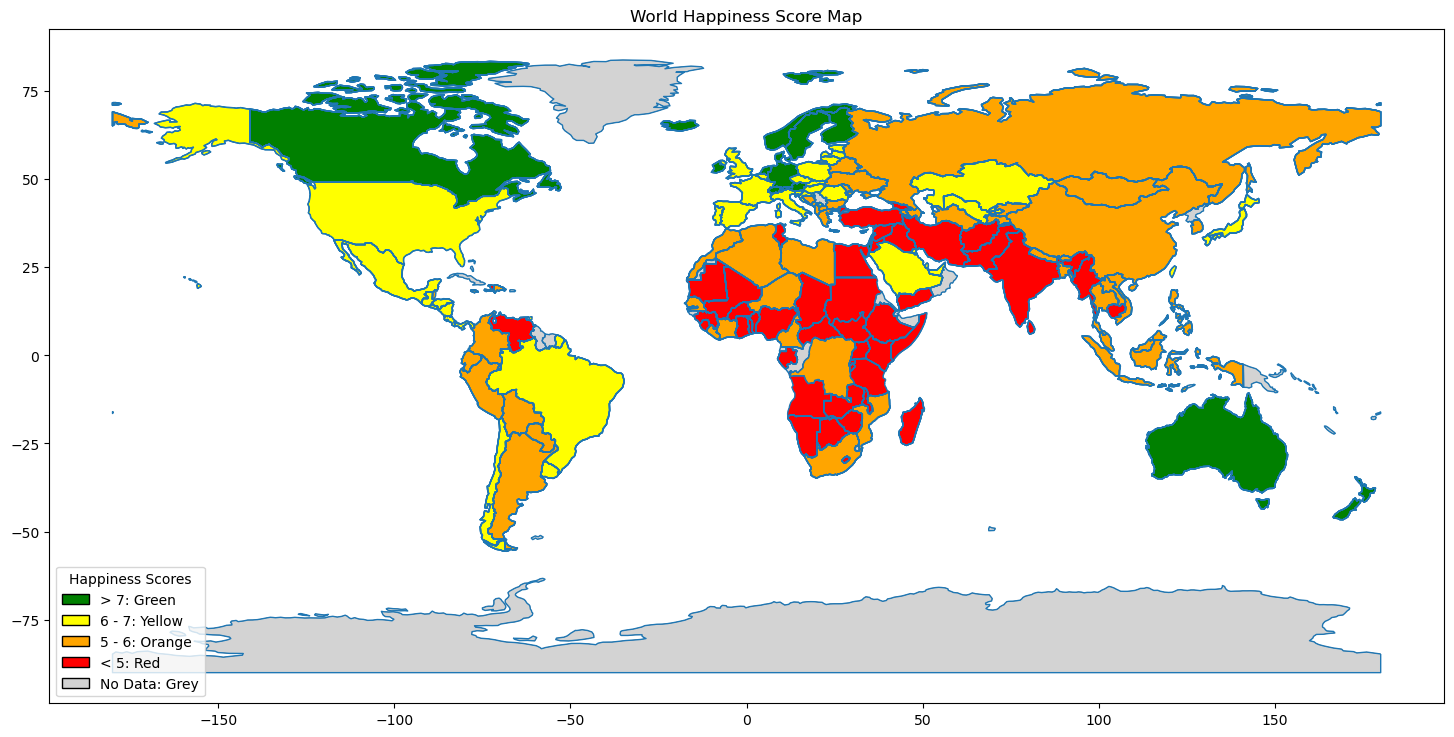

In [26]:
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='> 7: Green'),
    Patch(facecolor='yellow', edgecolor='black', label='6 - 7: Yellow'),
    Patch(facecolor='orange', edgecolor='black', label='5 - 6: Orange'),
    Patch(facecolor='red', edgecolor='black', label='< 5: Red'),
    Patch(facecolor='lightgrey', edgecolor='black', label='No Data: Grey')
]
fig, ax = plt.subplots(1, 1, figsize=(18, 13))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='color', ax=ax, color=world['color'], linewidth=0.2, edgecolor='black')
ax.legend(handles=legend_elements, loc='lower left', title="Happiness Scores")
ax.set_title('World Happiness Score Map')
plt.show()

In [28]:
plt.savefig('world_happiness_map.png', bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>